# Mahoodworth Submission:


Impact of News Sentiment on the Stock Market

RMDS 2021 Challenge

By: Koa Mahuna & Aiden Woodworth

### Introduction

>  The problem we set out to tackle was to find a way to predict the impact of news sentiment in the stock market. Utilizing our data science skills and knowledge, our group was able to come up with a model that takes into account news sentiment, along with other factors, to predict the stock price of companies in the oil industry. Some of the big companies that comprise this industry are: Exxon, Chevron, ConocoPhillips, and BP. The sentiment scores for the oil industry were mostly negative during the year that we analyzed, 2019. Despite the negative scores, the price of oil increased by over 33 percent during that year.





### Data

> We used 2 data sources for this project: Yahoo Finance and worlddata.ai.

> For historical data, we decided to use a time period of 1-1-2019 until 12-31-2019. We made this decision based on the disruptive events of 2020. We felt that the erratic nature of 2020 would lead to a misleading model and that we would be better off building a model around a more stable year.

> We used a python package to import the stock price history of CVX, COP, and BP. The data for this package is sourced from Yahoo Finance.

**Oilprice.csv:**

This dataset was downloaded from Yahoo Finance. It contains historical data about the price and volume sold of crude oil. 

Date-The date that the information on oil was recorded

Open-The price of crude oil when the market opened

High-The highest price reached by crude oil that day

Low-The lowest price reached by crude oil that day

Close-The price of crude oil when the market closed that day

Adj Close-The closing price adjusted for any splits of dividends that were distributed that day 

Volume-The number of barrels sold that day


**Sentiment_finance_news.csv:**

This dataset was downloaded from worlddata.ai. We selected financial news sources. We further sliced the data by only including articles that mentioned the word “oil”.

Date-The date that articles were published

Sentiment-Sentiment score provided by worlddata.ai

Count-Number of articles published that day



### Initial Model:

In the beginning of our project we decided to create a model that could be utilized to predict a single company’s stock price. The company being predicted could be swapped out for any of the other gas companies. For our tests we decided to use Exxon Mobil as our dependent variable however, any company could have been used. In order to predict a continuous value, like stock price, we decided a regression would be the best technique to use.  Our initial attempts to construct a successful model to predict the stock price of Exxon raised some errors. To start off, we attempted to create a simple-linear model between the stock price of Exxon and the sentiment analysis results. However, we noticed that the prediction model was not accurate at all. Upon further analysis into the effectiveness of the model, we found that it resulted in a p-value far greater than anything that would indicate significance. It also resulted in an r-squared value close to 0.01, which means that there is essentially no correlation between the two variables. This would not have resulted in an effective prediction model, and therefore we needed to make some changes.


In [146]:
# We begin by importing all of the dependencies we will need for our project.
import pandas_datareader.data as web
import datetime as dt
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [147]:
#Next we will read our .csv file into pandas DataFrames
sentiment_df = pd.read_csv('sentiment_finance_news.csv')[['Date', 'Sentiment']]

In [148]:
#We will be using the pandas_datareader.data package in order to retrieve stock information from mYahoo Finance
#We begin by defining variables that we can use to select our time period
start = dt.datetime(2019,1,1)
end = dt.datetime(2020,1,1)
#Next, call on the function to retrieve relevant stock information
#We will slice for only the Adj Close price and simply use that for analysis.
exxon_df = web.DataReader(['XOM'],'yahoo', start, end).reset_index()[['Date','Adj Close']]

In [149]:
#There are hierarchical labels so we select one tier of labels to flatten them.
exxon_df.columns = exxon_df.columns.get_level_values(0)

In [150]:
#Rename our XOM price column for clarity
exxon_df.rename(columns={"Adj Close": "XOM"}, inplace=True)

In [151]:
#convert our Date column to the proper data type
sentiment_df['Date'] = pd.to_datetime(sentiment_df['Date'])

In [152]:
#Merge our dataframes into a single one for our model
simple_reg_df = exxon_df.merge(sentiment_df, on='Date', how='inner')

In [153]:
#Checking to ensure our data is set up properly
simple_reg_df

,Date,XOM,Sentiment
0,2019-01-02,60.557911,-0.113408
1,2019-01-03,59.628124,-0.146209
2,2019-01-04,61.826595,-0.107933
3,2019-01-07,62.148109,-0.096128
4,2019-01-08,62.599968,-0.130769
...,...,...,...
247,2019-12-24,63.758801,-0.074576
248,2019-12-26,63.858959,-0.077838
249,2019-12-27,63.640423,-0.058824
250,2019-12-30,63.267101,-0.077459


In [154]:
#We decided to use this package from statsmodel to run our model because it returns us a useful summary table
lm1 = smf.ols(formula='XOM ~ Sentiment', data=simple_reg_df).fit()

In [155]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    XOM   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                  0.006669
Date:                Sun, 21 Mar 2021   Prob (F-statistic):              0.935
Time:                        20:27:21   Log-Likelihood:                -665.95
No. Observations:                 252   AIC:                             1336.
Df Residuals:                     250   BIC:                             1343.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     65.6835      1.191     55.137      0.000      63.337      68.030
Sentiment      0.8600     10.532      0.082      0.935     -19.882      21.602
==============================================================================
Omnibus:                       47.722   Durbin-Watson:                   0.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.053
Skew:                           0.408   Prob(JB):                     0.000198
Kurtosis:                       2.021   Cond. No.                         49.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This indicates that sentiment scores are not a good predictor. Let us visualize the relationship to decide for ourselves.

In [156]:
#Set thesize of our charts in order to make them more readable.
plt.rcParams["figure.figsize"] = [25,10]

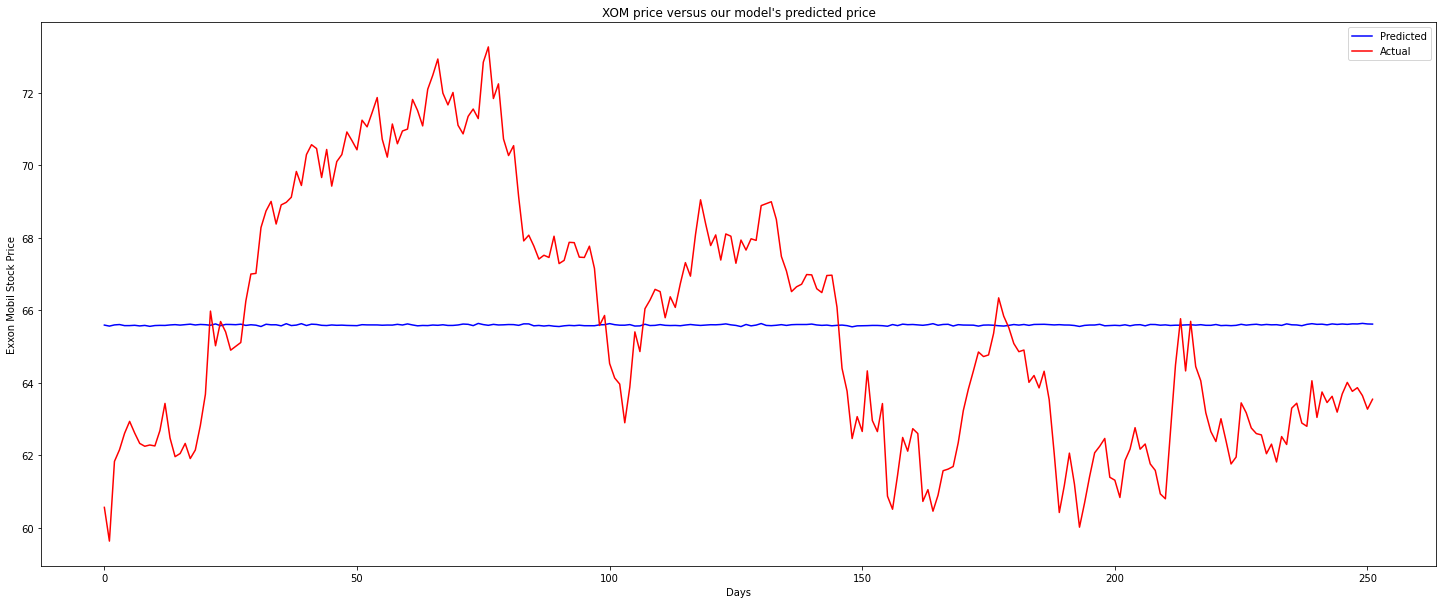

In [157]:
plt.plot(lm1.predict(), label='Predicted', c='b')
plt.plot(simple_reg_df.XOM, label='Actual', c='r')
plt.xlabel('Days')
plt.ylabel('Exxon Mobil Stock Price')
plt.title("XOM price versus our model's predicted price")
plt.legend(loc='upper right')

We can see our initial model does not track the true value well. Is there an issue with using sentiment as our predictor?

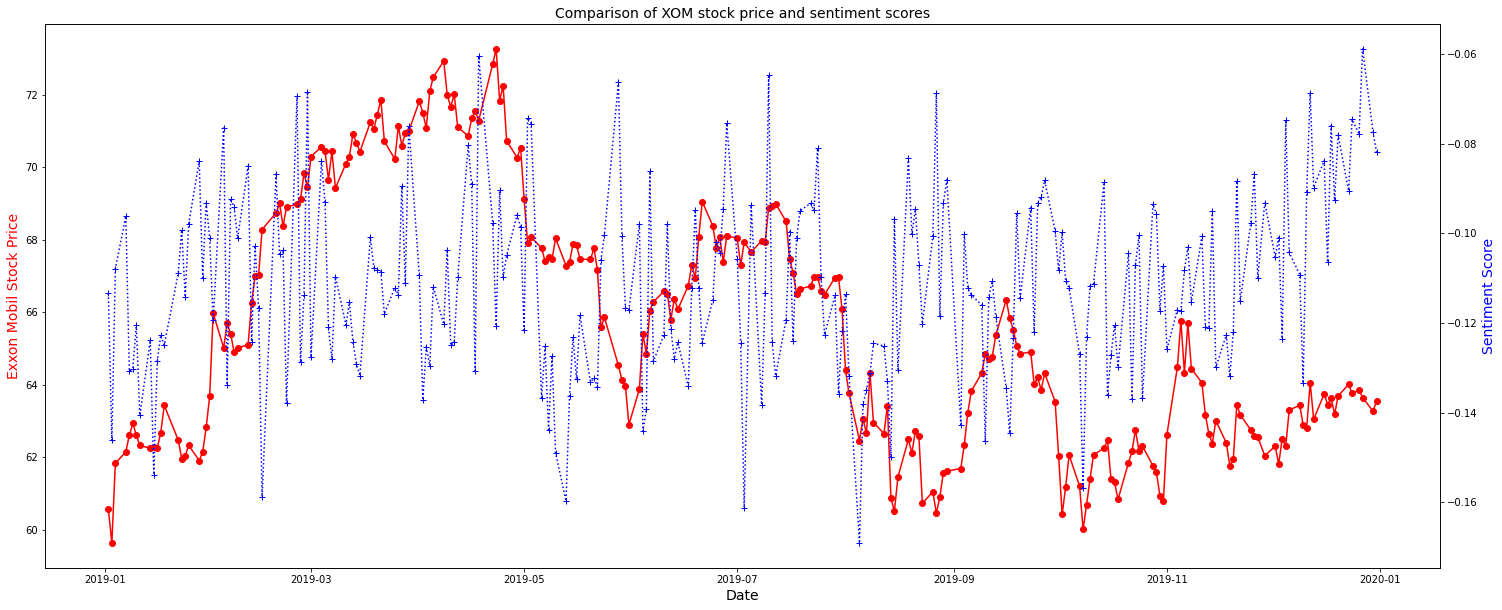

In [158]:
# Here we create a more advanced graph to show the relationship
fig,ax = plt.subplots()
ax.plot(simple_reg_df.Date, simple_reg_df.XOM, color="red", marker="o")
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("Exxon Mobil Stock Price",color="red",fontsize=14)
ax.set_title('Comparison of XOM stock price and sentiment scores', fontsize=14)

#Creating our second object to graph
ax2=ax.twinx()
ax2.plot(simple_reg_df.Date, simple_reg_df['Sentiment'],color="blue", linestyle=':', marker='+' )
ax2.set_ylabel("Sentiment Score",color="blue",fontsize=14)

plt.show()

We can see that sentiment seems to underestimate or overestimate the values often. Our previous regression that indicates very low correlation makes more sense now. Sentiment alone is a poor predictor, we need to include more information for our model.


### Improved Model:

In order to follow up our original attempt we wanted to improve our explanatory power. To achieve this we decided to go with a multi-linear regression. By using a multi-linear regression, we are able to utilize a variety of independent variables that have solid correlation to the dependent variable, the stock price of a select oil company. To start off, we decided to focus on one company’s stock price in the oil industry, ExxonMobil. There were three key areas that we looked at as our independent variables: Exxon’s competitors’ stock price, crude oil’s options price, and the values from a sentiment analysis for news articles about the oil industry. We felt that our initial regression had low explanatory power because we did not account for oil market conditions. Our new independent variables were added in order to account for oil market conditions in the equation. 


In [159]:
#In order to create our multi linear regression we need to gather stock information on our competitor's prices.
#We will slice for only the Adj Close column as that is the one we want to regress on. 
competitor_df = web.DataReader(['XOM', 'BP', 'CVX', 'COP'],'yahoo', start, end).reset_index()[['Date', 'Adj Close']]
#Rename columns appropriately
competitor_df.columns = ['Date', 'XOM', 'BP', 'CVX', 'COP']

In [160]:
#Furthermore, we will import our information about the oil market.
oil_df = pd.read_csv('oilprice.csv')[['Date', 'Adj Close', 'Volume']]
oil_df['Date'] = pd.to_datetime(oil_df['Date'])

In [161]:
#Merge these 2 DataFrames into a single one for analysis by joining them on date
multi_lin_df = competitor_df.merge(oil_df, on='Date', how='inner')

In [162]:
#Finally, we merge the sentiment values into this table
multi_lin_df = multi_lin_df.merge(sentiment_df, on='Date', how='inner')

In [163]:
#Due to null values, we decided to use a forward fill technqiue to fill them in. This fill method works by taking the previous day's value for the absent day. We felt this would be the most appropriate way of filling the values.
multi_lin_df.ffill(inplace=True)

In [164]:
#Renamed the oil price column to make it more reflective of the columns value.
multi_lin_df.rename(columns={"Adj Close": "oil_price"}, inplace=True)

In [165]:
multi_lin_df

,Date,XOM,BP,CVX,COP,oil_price,Volume,Sentiment
0,2019-01-02,60.557911,33.171741,99.261368,59.058521,46.540001,850480.0,-0.113408
1,2019-01-03,59.628124,33.360847,97.360268,57.940350,47.090000,788718.0,-0.146209
2,2019-01-04,61.826595,34.409554,99.377945,59.403297,47.959999,817277.0,-0.107933
3,2019-01-07,62.148109,34.521301,100.669258,59.142391,48.520000,819939.0,-0.096128
4,2019-01-08,62.599968,34.409554,100.229866,59.934433,49.779999,765981.0,-0.130769
...,...,...,...,...,...,...,...,...
247,2019-12-24,63.758801,34.770531,112.299507,61.607323,60.520000,314711.0,-0.074576
248,2019-12-26,63.858959,34.715683,112.542137,61.921692,61.680000,265091.0,-0.077838
249,2019-12-27,63.640423,34.605995,112.262199,61.902645,61.720001,351899.0,-0.058824
250,2019-12-30,63.267101,34.368343,111.842247,61.550171,61.680000,427149.0,-0.077459


In [166]:
#Bulding our new model with additional variables
multi_linear_reg = smf.ols(formula='XOM ~ BP + CVX + COP + oil_price + Volume + Sentiment', data=multi_lin_df).fit()

In [167]:
#Some of these values raise concerns which we will discuss.
multi_linear_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    XOM   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     270.8
Date:                Sun, 21 Mar 2021   Prob (F-statistic):          4.43e-105
Time:                        20:27:48   Log-Likelihood:                -409.89
No. Observations:                 252   AIC:                             833.8
Df Residuals:                     245   BIC:                             858.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -16.6472      2.690     -6.189      0.000     -21.945     -11.349
BP             1.2900      0.073     17.627      0.000       1.146       1.434
CVX            0.2233      0.026      8.596      0.000       0.172       0.274
COP            0.1181      0.026      4.597      0.000       0.067       0.169
oil_price      0.0687      0.030      2.320      0.021       0.010       0.127
Volume      8.716e-07      4e-07      2.177      0.030    8.31e-08    1.66e-06
Sentiment     -4.8300      4.067     -1.188      0.236     -12.840       3.180
==============================================================================
Omnibus:                        6.243   Durbin-Watson:                   0.213
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                6.421
Skew:                          -0.377   Prob(JB):                       0.0403
Kurtosis:                       2.789   Cond. No.                     3.41e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.41e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#This model has far greater explanatory power. Let us graph the new predictions to compare.

Text(0, 0.5, 'Predicted values')

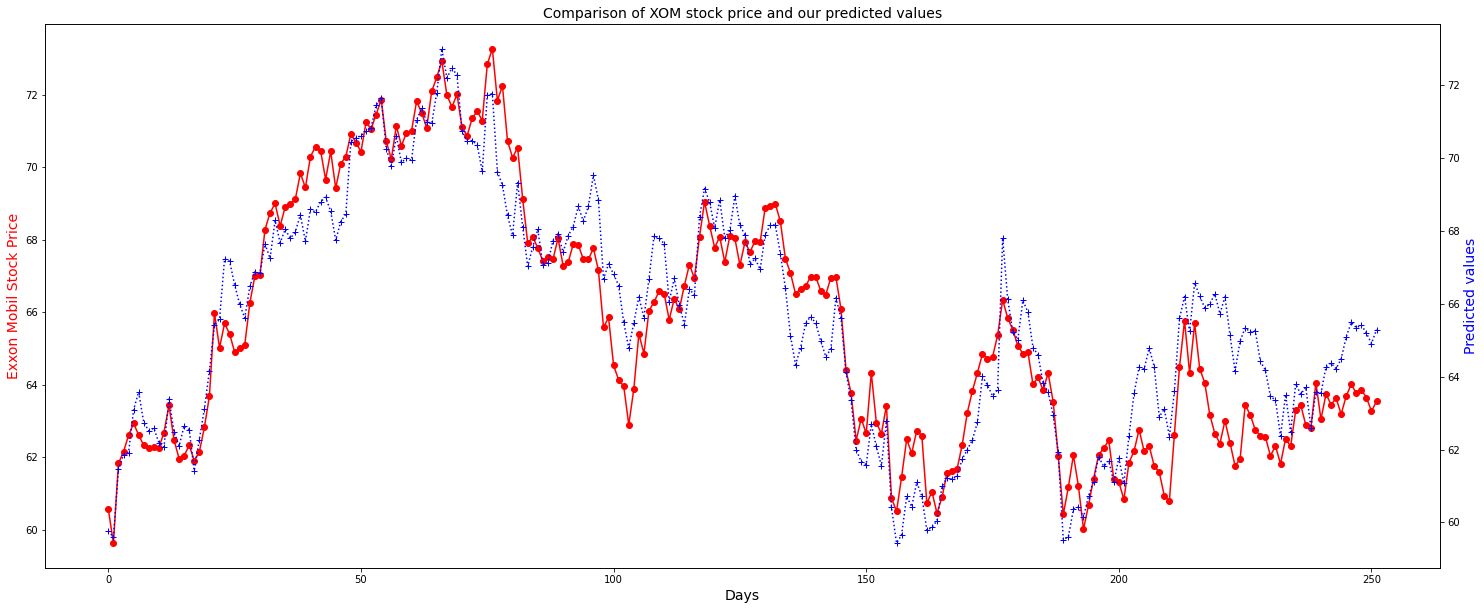

In [168]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(multi_lin_df.XOM, color="red", marker="o")
# set x-axis label
ax.set_xlabel("Days",fontsize=14)
# set y-axis label
ax.set_ylabel("Exxon Mobil Stock Price",color="red",fontsize=14)
ax.set_title('Comparison of XOM stock price and our predicted values', fontsize=14)
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(multi_linear_reg.predict(),color="blue", linestyle=':', marker='+' )
ax2.set_ylabel("Predicted values",color="blue",fontsize=14)

Our model tracks the true value far better than before.


### Model Evaluation


In this section we would like to evaluate our improved model. Firstly, we will address the strengths of our model. Secondly, we will highlight issues with our model and areas for improvement. Finally, we will identify what we believe should be done for future iterations of this model.

Our model is proficient in three areas: computational efficiency, simplicity, and scalability. A regression requires far less computing power than other machine learning models to run. When compared against techniques like ensemble methods or neural networks, it is apparent that regressions save us time and resources. With regards to simplicity, we believe that a regression’s output is more apparent to someone unfamiliar with statistics or ML. Therefore, if we were to use our model it would be easier for them to comprehend and leverage inorder to improve business processes. We prioritized a model that would be easy to explain. Complex models are less effective if managers don’t have the background knowledge to understand the output. With a model like our regression, a manager could utilize our model with little to no background information required. Our final strength is scalability; this model can be implemented in larger contexts with minimal tweaks and adjustments. With a more nuanced model, you often have many more considerations to take into account when scaling your model. A final version of our multi-linear regression would require little attention as the amount of data passed through it increased.

On the other hand, we do acknowledge that our model has some issues that would need to be remedied. We have 2 primary concerns with our own model: reverse causality and multicollinearity. Reverse causality is an issue where the dependent variable is actually responsible for some variance in the independent variables. In our case we have included a number of variables that this may hold true for. The best example of this would be the competitor stock prices that we are comparing against. It may be true that the price of Exxon Mobil is responsible for changes in the prices of other gas companies. For example, if Exxon Mobil invents a cheaper way to transport gas and massively increases their profitability; this could lead to optimism about the gas industry as a whole and its competitors could see this optimism manifest itself in higher stock prices. Along the same vein, we have identified an issue of multicollinearity among the variables we selected. This means our independent variables are highly related to one another. We have gas company stock prices, oil prices, and oil demand included in our model. All of these are highly related to one another. In hindsight, including a number of closely related variables like we did was a poor decision. To explain how this bias might appear in our model, allow me to outline an example: imagine that there is some legislation that is passed to lower the tariffs that we pay to import oil into the United States. This would be good news for the oil industry as it would make gas cheaper to import. We would want this positive impact to be reflected in our model. However, since it would have a positive impact on company stock prices and oil demand we would actually be counting the impact multiple times in our regression. We would be overestimating the impact that this action had. These issues would be addressed by selecting independent variables that are truly independent of one another. In the following section, we will outline the changes we recommend for improving this model. 


### Proposed Improvements:

In future iterations of this model we would address the issues we ran into on our first few attempts. The main things we would want to address would be reverse causality, multicollinearity, and deployability. Our attempts to ensure the independence of our variables would likely address our concerns of both reverse causality and multicollinearity. In a future model, we would like to focus more solely on sentiment analysis for our predictions. We would like to perform topic modeling on financial news in order to separate the news articles into categories. From here, we believe we could find a stronger correlation between articles and the stock price of a company. Utilizing all financial news articles likely diluted our results and led to a very small coefficient on our sentiment column. Furthermore, we would have liked to have included an interactive dashboard for users. If we had more time to improve upon our model we would have constructed an interactive dashboard to more easily display the results of the model.


### Managerial Implications:

The primary use of our model would be to make predictions about a company’s stock price. This would prove useful in a number of scenarios. As an investor, if the true price of a stock is lower than your model predicts that may indicate it is undervalued. In another scenario, a manager might be able highlight the variables that have the largest impact on stock price and focus on that relationship. Understanding how the most impactful variables are related to your company may give you more information about your industry as a whole. There are a number of scenarios in which having our model would serve a manager well. We would want to further refine our model prior to any of these uses.

### Conclusion:

In an attempt to predict the stock price of gas companies, we decided to use a linear regression with a sentiment score as our sole independent variable. After discovering that we had very low explanatory power on that model, we tweaked our model to include competitor’s stock prices and oil market conditions alongside the sentiment score. This model produced much more explanatory power. Our second model was an efficient, scalable model; however, it had issues with multicollinearity and reverse causality. In the future, we will be more careful when selecting our independent variables to ensure there is little to no correlation amongst them. We believe our model, as it currently stands, is a decent predictor of any company’s stock prices. We would not implement our model into any real context due to our concerns about it’s integrity. In conclusion, these models have limited real world application but they have served as a meaningful learning experience for us to practice building regressions and interpreting their results. 
